# **1 Introduction**

**Title**: Search-based Approaches for Maze Solving: Implementing and Comparing DFS and A* Search Algorithms

**Author**: Joshua Finney

**Date**: 13/03/2023

**Purpose**: The notebook discusses the application of search-based approaches to maze-solving and compares the performance and efficiency of two algorithms, Depth-first Search (DFS) and A* Search. It covers the implementation of both algorithms, including optimization techniques, and analyzes their performance using various statistics.

**References (IEEE)**:
1. “Rat in a maze,” GeeksforGeeks, 12-Jan-2023. [Online]. Available: https://www.geeksforgeeks.org/rat-in-a-maze/. [Accessed: 19-Feb-2023].
2. M. A. Naeem, “A-star (A*) search for solving a maze using python (with visualization),” Medium, 26-Oct-2021. [Online]. Available: https://levelup.gitconnected.com/a-star-a-search-for-solving-a-maze-using-python-with-visualization-b0cae1c3ba92. [Accessed: 21-Feb-2023].
3. “Pyplot tutorial,” Pyplot tutorial - Matplotlib 3.7.1 documentation. [Online]. Available: https://matplotlib.org/stable/tutorials/introductory/pyplot.html. [Accessed: 25-Feb-2023].
4. “How to use bidirectional search implementation in Python,” Educative. [Online]. Available: https://www.educative.io/answers/how-to-use-bidirectional-search-implementation-in-python. [Accessed: 25-Feb-2023]. 
5. “7. input and output,” Python documentation. [Online]. Available: https://docs.python.org/3/tutorial/inputoutput.html#:~:text=To%20read%20a%20file's%20contents,is%20an%20optional%20numeric%20argument. [Accessed: 29-Feb-2023].
6. Mariaprsk and mariaprskmariaprsk                    39155 silver badges77 bronze badges, “Comparing classical tree-search algorithms (BFS,DFS,a*,ids) - when to use one or the other?,” Computer Science Stack Exchange, 01-Dec-1966. [Online]. Available: https://cs.stackexchange.com/questions/119544/comparing-classical-tree-search-algorithms-bfs-dfs-a-ids-when-to-use-one-or. [Accessed: 10-Mar-2023]. 


## **Instructions**

To ensure that the code runs smoothly, it is recommended to execute the code blocks in sequential order, starting from the top.

The figures and plots methods use Matplotlib to generate visualizations of the paths found by each algorithm. By default, these methods will load the initial four mazes (`maze-Small.txt`, `maze-Medium.txt`, `Maze-Large.txt`, `Maze-VLarge.txt`) specified in the project. If you wish to use custom mazes, add the file names to the `mazes` array.

It is important to note that some methods rely on dependent methods that have already been initialized. Therefore, executing the code blocks out of order may result in errors.

Finally, the `requirements.txt` file contains all the necessary dependencies for this Jupyter notebook. To install these dependencies, use the `!pip install -r requirements.txt` command.

With these instructions in mind, you are ready to run the code and explore the search algorithms on the provided mazes. Enjoy!

## **Structure**

[**1.1 Search-based Approach to Maze Solving**](#11-search-based-approach-to-maze-solving)

This section covers question 1.1 (*Describe how you would frame the maze solver as a search problem*). I explain how the maze solver can be interpreted as a search problem, and provide two methods that will be used in the search algorithm implementations. The functionality is explained as a concise, high-level algorithm.

[**1.2 Depth-first Search**](#12-depth-first-search)

This section covers question 1.2 (*Solve the maze using depth-first search*). I provide a basic and optimized implementation of DFS that returns all relevant statistics, along with a short description of the algorithm. I also provide an analysis of its optimization from the basic implementation. The optimized implementation is generalized to calculate paths and statistics for the mazes provided.

Each statistic for the optimized implementation is critically analyzed and discussed. Additionally, I provide a written assessment of further optimization and potential methods for optimizing large-sized mazes.

[**1.3 A\* Search**](#13-a-search)

This section covers question 1.3 (*Suggest an improved algorithm for this problem*). Here, you will find two implementations of A* Search. The first implementation is without optimization techniques, and I provide an overview and algorithm for this. The second implementation is a more optimized A* Search Maze solver, and I also provide an overview and algorithm for this. Additionally, there are figures and plots to visualize the difference in performance and efficiency, along with analysis of the figures.

I also critically and thoroughly discuss the statistics of my optimized A* Search implementation. These are the same statistics as the DFS statistics analysis.

[**1.4 DFS vs. A\* Search**](#14-dfs-vs-a-search)

This section highlights the differences between these algorithms based on three main statistics: execution time, path length, and number of visited nodes. These statistics are compared and discussed thoroughly through figures and plots, as well as comparing the theory behind each algorithm to their real-life performance as a maze solver.

# **1.1 Search-Based Approach to Maze Solving**

A maze solver can be seen as a search problem because the goal is to find a path from a starting point to a goal point, while navigating through a complex maze structure. In this CA, the maze can be represented as a graph where the nodes are the intersections of paths and the edges connect neighboring nodes. The search problem is then to find a path from the starting node to the goal node, while avoiding obstacles in the form of walls represented by the '`#`' symbol.

The problem of finding a path in a maze with a specified start and end point is a classic example of a graph search problem, where the objective is to find a sequence of actions/moves that leads from the initial state to the goal state. In this CA, the start node is the only path on the top line of the maze and the goal node is the only path on the bottom line of the maze, which gives a clear definition of the search problem.

Below are two functions that will be used in the DFS and A* Search implementation to read the mazes into the program to parse and to return the path as a coordinate in order to visualise the path.

## **Shared Maze Reader Function**

In [3]:
from typing import List


def read_maze(file_name: str) -> List[List[str]]:
    """
    Reads a maze from a file and returns it as a 2D list of characters.

    Args:
        file_name (str): Name of the file to read the maze from.

    Returns:
        List[List[str]]: The maze represented as a 2D list of characters.
    """
    # Open the input file for reading
    with open(file_name, 'r') as f:
        
        # Read the contents of the file
        contents = f.read()
        
        # Determine the number of rows and columns in the maze
        rows = 0
        for line in contents.split('\n'):
            if any(c in line for c in ['#', '-']):
                rows += 1
        cols = len(contents.split('\n')[0])
        
        # Find the midpoint of the first row to determine the width of each cell in the maze
        c = 0
        space = False
        while c < cols:
            if (contents[c] == ' ' and space) or contents[c] == '\n':
                break
            elif contents[c] == ' ':
                space = True
            else:
                space = False
            c += 1
        
        cols = c // 2

        # Initialize the maze as a 2D list of size rows x cols
        maze = [['#' for j in range(cols)] for i in range(rows)]

        # Populate the maze based on the contents of the file
        i = 0
        j = 0
        k = 0
        while k < len(contents):
            if contents[k] == '#' or contents[k] == '-':
                maze[i][j] = contents[k]
                j += 1
                if j == cols or contents[k] == ' ':
                    j = 0
                    i += 1
            k += 1
            if i == rows and j == 0:
                break
    
    # Ask the user if they want to print the maze
    user_input = input("Print the maze? (y/n): ")
    if user_input.lower() == 'y':
        # Print the maze to verify it was read correctly
        for row in maze:
            print(''.join(row))

    return maze

### **Algorithm**

1. Open the file specified by the input file name.

2. Read the contents of the file.

3. Determine the number of rows and columns in the maze.

4. Find the midpoint of the first row to determine the width of each cell in the maze.

5. Initialize the maze as a 2D list of size rows x cols.

6. Populate the maze based on the contents of the file.

7. Ask the user if they want to print the maze.

8. If the user wants to print the maze, print it to the console.

9. Return the maze as a 2D list of characters.

## **Shared Path-extraction Function**

In [4]:
from typing import List, Tuple


def get_path_coordinates(path: List[Tuple[int, int]]) -> List[Tuple[int, int]]:
    """
    Get the coordinates where the direction of the path changes.

    Args:
        path (list): A list of tuples representing the coordinates of the path.

    Returns:
        list: A list of tuples representing the coordinates where the direction of the path changes.
    """
    # Add the starting coordinate to the list of path coordinates
    path_coords = [path[0]]

    # Iterate over the path and add each coordinate where the direction changes
    for i in range(1, len(path) - 1):
        prev_coord = path[i - 1]
        curr_coord = path[i]
        next_coord = path[i + 1]

        # Check if the current coordinate belongs to a straight path,
        # i.e. either x coordinate of current node is same as previous and next node or
        # y coordinate of current node is same as previous and next node.
        if (curr_coord[0] == prev_coord[0] and curr_coord[0] == next_coord[0]) or \
                (curr_coord[1] == prev_coord[1] and curr_coord[1] == next_coord[1]):
            continue

        # Append intersection of the path (e.g. where the path changes directions)
        path_coords.append(curr_coord)

    # Append last node of the path, because that's the goal
    path_coords.append(path[-1])

    return path_coords

### **Algorithm**


1. Create an empty list to hold the path coordinates.

2. Add the first coordinate of the path to the list.

3. Loop through each coordinate in the path, except for the first and last coordinates.

4. Check if the current coordinate belongs to a straight path by comparing its x and y coordinates with those of the previous and next coordinates.

5. If the current coordinate belongs to a straight path, skip it.

6. If the current coordinate does not belong to a straight path, append it to the list of path coordinates.

7. After the loop, append the last coordinate of the path to the list of path coordinates.

8. Return the list of path coordinates.

# **1.2 Depth-first Search**

## **Implementations**

### **Basic**

In [5]:
import time

def dfs_unoptimised(maze):
    """
    Implementation of depth-first search algorithm to solve a maze.

    Args:
        maze (list of str): a list of strings representing the maze

    Returns:
        tuple: a tuple containing:
            - path (list of tuples): a list of tuples representing the path from start to goal
            - node_count (int): an integer representing the number of nodes visited
    """
    visited = []
    # Start node is the only '-' character in the first row
    start = (0, maze[0].index('-'))
    # Goal node is the only '-' character in the last row
    goal = (len(maze)-1, maze[-1].index('-'))
    path = dfs_helper(maze, start, goal, visited)
    return path, len(visited)


def dfs_helper(maze, start, goal, visited):
    """
    Helper function for dfs_unoptimized.

    Args:
        maze (list of str): a list of strings representing the maze
        start (tuple): a tuple representing the current node
        goal (tuple): a tuple representing the goal node
        visited (list of tuples): a list of tuples representing the nodes visited so far

    Returns:
        list of tuples: a list of tuples representing the path from start to goal
    """
    # Base case: when the current node is the goal node
    if start == goal:
        return visited + [start]
    # Add the current node to the visited nodes
    visited.append(start)
    # Recursive case: check the neighbors of the current node
    for neighbor in get_neighbors(maze, start):
        if neighbor not in visited:
            # If the neighbor is unvisited, recursively check its neighbors
            path = dfs_helper(maze, neighbor, goal, visited)
            if path:
                return path
    # If no path is found, return None
    return None


def get_neighbors(maze, node):
    """
    Helper function for dfs_helper.

    Args:
        maze (list of str): a list of strings representing the maze
        node (tuple): a tuple representing the current node

    Returns:
        list of tuples: a list of tuples representing the neighboring nodes
    """
    row, col = node
    neighbors = []
    # Check the neighbor above the current node
    if row > 0 and maze[row-1][col] != '#':
        neighbors.append((row-1, col))
    # Check the neighbor below the current node
    if row < len(maze)-1 and maze[row+1][col] != '#':
        neighbors.append((row+1, col))
    # Check the neighbor to the left of the current node
    if col > 0 and maze[row][col-1] != '#':
        neighbors.append((row, col-1))
    # Check the neighbor to the right of the current node
    if col < len(maze[0])-1 and maze[row][col+1] != '#':
        neighbors.append((row, col+1))
    # Return the neighboring nodes
    return neighbors

In [6]:
# Prompt user to enter maze file path
maze_file = input("Enter file name (including file type e.g. maze-Small.txt): ")

# Read maze file
maze = read_maze(maze_file)

# Solve maze using DFS algorithm
start_time = time.time()
path, node_count = dfs_unoptimised(maze)
end_time = time.time()
dfs_time = end_time - start_time

# Print solution path and statistics
print("Solution statistics:")
print("• Number of nodes visited: {}".format(node_count))
if path is not None:
    print("• Length of path: {}".format(len(path)))
    print("• Path coordinates: {}".format(get_path_coordinates(path)))
    print("• Solution path found: {}".format(path))
print("• Time taken: {:.4f} seconds".format(dfs_time))

Solution statistics:
• Number of nodes visited: 81
• Length of path: 82
• Path coordinates: [(0, 1), (1, 1), (1, 5), (5, 5), (5, 6), (8, 6), (8, 7), (7, 5), (7, 4), (8, 4), (8, 1), (3, 1), (5, 2), (5, 3), (4, 3), (4, 4), (5, 7), (5, 8), (6, 8), (6, 10), (5, 10), (6, 11), (6, 13), (5, 13), (6, 14), (6, 15), (1, 15), (1, 11), (3, 11), (1, 10), (1, 8), (3, 8), (3, 7), (1, 7), (1, 17), (4, 17), (4, 18), (2, 18), (3, 14), (6, 16), (6, 17), (8, 17), (8, 18), (9, 18)]
• Solution path found: [(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (5, 6), (6, 6), (7, 6), (8, 6), (8, 7), (7, 5), (7, 4), (8, 4), (8, 3), (8, 2), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (5, 2), (5, 3), (4, 3), (4, 4), (5, 7), (5, 8), (6, 8), (6, 9), (6, 10), (5, 10), (6, 11), (6, 12), (6, 13), (5, 13), (6, 14), (6, 15), (5, 15), (4, 15), (3, 15), (2, 15), (1, 15), (1, 14), (1, 13), (1, 12), (1, 11), (2, 11), (3, 11), (1, 10), (1, 9), (1, 8), (2, 8), (3, 8), (3, 7), (1, 7), (1, 6), (1

#### **Overview**

This unoptimised version of depth-first search algorithm uses a recursive helper function `dfs_helper` to explore the maze by visiting each neighbor of the current node and recursively visiting their unvisited neighbors until the goal node is found.

The `visited` list keeps track of the visited nodes to avoid revisiting them. The `get_neighbors` function returns the unvisited neighboring nodes of the current node.

However, this implementation is not optimized because it uses recursion, which could lead to a stack overflow if the maze is too large (Doesn't work for `maze-Large.txt` and `maze-VLarge.txt`). For instance, the Python interpreter has a maximum recursion depth of 1000 by default, and if the algorithm exceeds that limit, it will result in a stack overflow error.

One way to optimize this implementation is to use an iterative implementation of DFS with a stack data structure instead of using recursion. This approach avoids the risk of stack overflow and generally performs better for large mazes. Instead of making recursive calls, the algorithm pushes unvisited neighbors onto the stack, then visits the next neighbor on the top of the stack. This process continues until the goal node is found or the stack becomes empty.

#### **Algorithm**

`DFS_unoptimised`:

1. Initialize an empty visited list.
2. Find the start and goal nodes.
3. Call dfs_helper with the maze, start, goal, and visited and store the returned path and node_count.
4. Return the path and node_count.

`dfs_helper`:
1. If start is equal to goal, return visited list with start appended.
2. Append start to visited.
3. For each unvisited neighbor of start, call dfs_helper recursively with neighbor as new start.
4. If a path is returned, return the path.
5. If no path is returned, return None.

`get_neighbors`:
1. Initialize empty neighbors list.
2. For each valid neighbor node of current node, append it to neighbors.
3. Return neighbors.

### **Optimised**

In [7]:
def dfs_optimised(maze):
    """
    Find a path from the starting point to the goal point in a maze using Depth-First Search algorithm.

    Parameters:
        maze (list): A two-dimensional list of characters that represents a maze,
                     where '-' characters represent open paths, and '#' characters represent walls.

    Returns:
        tuple: A tuple containing two elements:
                1. A list of tuples representing the path from the starting point to the goal point in the maze.
                2. An integer representing the number of nodes visited during the search process.

    If no path is found, the function returns None for the path and the number of visited nodes.
    """
    # Start node is the only '-' character in the first row
    start = (0, maze[0].index('-'))
    # Goal node is the only '-' character in the last row
    goal = (len(maze) - 1, maze[-1].index('-'))

    # To keep track of visited nodes
    visited = set()

    # Stack for DFS
    stack = [start]

    # To keep track of parent nodes for backtracking
    parent = {start: None}

    # To count the number of nodes visited during search
    node_count = 0

    # DFS loop
    while stack:
        # Pop a node from the top of stack
        node = stack.pop()

        # Check if the node is the goal node
        if node == goal:
            # Backtrack from the goal node to the start node to obtain the path
            path = []
            while node:
                path.append(node)
                node = parent[node]
            # Reverse the path since it was obtained by backtracking
            path.reverse()
            # Calculate the length of path
            path_length = len(path) - 1  # -1 because start node is not counted in the path length

            # Return the path and visited nodes.
            return path, node_count

        # If node is already visited, skip it
        if node in visited:
            continue

        # If node is not visited yet
        node_count += 1
        visited.add(node)
        x, y = node

        # Add all unvisited neighboring nodes to the stack
        if x > 0 and maze[x - 1][y] == '-' and (x - 1, y) not in visited:
            stack.append((x - 1, y))
            parent[(x - 1, y)] = node

        if x < len(maze) - 1 and maze[x + 1][y] == '-' and (x + 1, y) not in visited:
            stack.append((x + 1, y))
            parent[(x + 1, y)] = node

        if y > 0 and maze[x][y - 1] == '-' and (x, y - 1) not in visited:
            stack.append((x, y - 1))
            parent[(x, y - 1)] = node

        if y < len(maze[0]) - 1 and maze[x][y + 1] == '-' and (x, y + 1) not in visited:
            stack.append((x, y + 1))
            parent[(x, y + 1)] = node

    # No path found
    return None, node_count

In [8]:
import time
# Prompt user to enter maze file path
maze_file = input("Enter file name (including file type e.g. maze-Small.txt): ")

# Read maze file
maze = read_maze(maze_file)

# Solve maze using DFS algorithm
start_time = time.time()
path, node_count = dfs_optimised(maze)
end_time = time.time()
dfs_time = end_time - start_time

# Print solution path and statistics
print("Solution statistics:")
print("• Number of nodes visited: {}".format(node_count))
if path is not None:
    print("• Length of path: {}".format(len(path)))
    print("• Path coordinates: {}".format(get_path_coordinates(path)))
    print("• Solution path found: {}".format(path))
print("• Time taken: {:.4f} seconds".format(dfs_time))

Solution statistics:
• Number of nodes visited: 35
• Length of path: 27
• Path coordinates: [(0, 1), (1, 1), (1, 15), (6, 15), (6, 17), (8, 17), (8, 18), (9, 18)]
• Solution path found: [(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 15), (3, 15), (4, 15), (5, 15), (6, 15), (6, 16), (6, 17), (7, 17), (8, 17), (8, 18), (9, 18)]
• Time taken: 0.0002 seconds


#### **Overview**

This optimised depth-first search implementation is a search algorithm that begins at the start node and explores as far as possible along each branch before backtracking. It uses a stack to store nodes and a set to keep track of visited nodes, making it more memory-efficient than the unoptimised implementation. The algorithm also tracks the parent nodes of each visited node to construct the path from the goal node to the start node once the goal is reached.

However, DFS is not guaranteed to find the shortest path from the start node to the goal node. It may explore nodes that are far away from the goal node before discovering the shortest path. Additionally, DFS may get stuck in a loop if it encounters a cycle in the graph. Therefore, DFS is not always the best choice for finding the shortest path in a maze.

Despite its limitations, the optimised DFS implementation is faster than many other search algorithms like A* because it only needs to store a single stack rather than a priority queue, which reduces memory usage. Additionally, it does not require a heuristic function, which can be computationally expensive in large graphs. Overall, the optimised DFS implementation is a good choice for finding paths in mazes, especially for smaller mazes where the path to the goal node is not too complex.

#### **Algorithm**

1. Initialize a stack and add the start node to it.

2. Create a visited set to keep track of which nodes have been visited.

3. While the stack is not empty, pop the top node from the stack and mark it as visited.

4. Check if the popped node is the goal node. If it is, then we have found a path from the start node to the goal node.

5. Otherwise, add all the unvisited neighboring nodes of the popped node to the stack and mark them as visited.

6. Repeat steps 3-5 until the stack is empty or the goal node is found.

7. If the goal node is found, backtrack from the goal node to the start node to obtain the path.

### **Comparison: Basic vs. Optimised**

Analyzing maze-Small.txt maze...
Analyzing maze-Medium.txt maze...


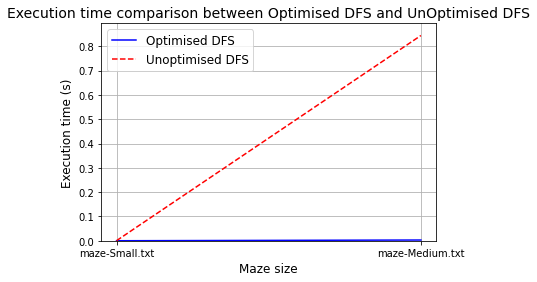

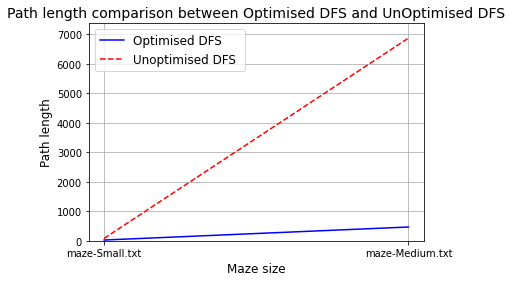

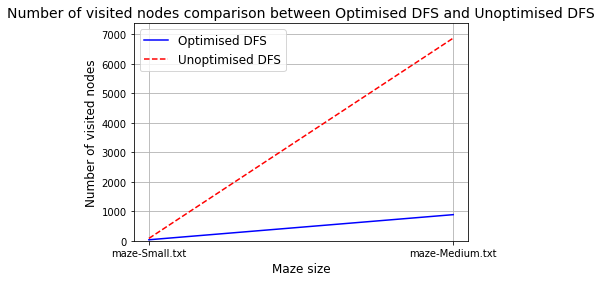

Statistics for maze-Small.txt:
• Unoptimised DFS: Path Length=81, Nodes Visited=81, Time=0.0005s
• Optimised DFS: Path Length=26, Nodes Visited=35, Time=0.0003s

Statistics for maze-Medium.txt:
• Unoptimised DFS: Path Length=6875, Nodes Visited=6875, Time=0.8443s
• Optimised DFS: Path Length=468, Nodes Visited=887, Time=0.0032s



In [13]:
import time
import matplotlib.pyplot as plt


def visualize_unopt_dfs_opt_dfs():
    """
    This function loads mazes of different sizes from text files and applies the optimized and unoptimized
    depth-first search algorithms to them. It measures the execution time, path length, and number of visited nodes
    for each algorithm on each maze. Then, it plots the results for each maze size and prints them to the console.

    Args:
        None

    Returns:
        None
    """

    # Define maze file names
    maze_files = ['maze-Small.txt', 'maze-Medium.txt']

    # Lists to store performance metrics for optimized and unoptimized algorithms for each maze
    opt_dfs_times, unopt_dfs_times = [], []
    opt_dfs_path_lengths, unopt_dfs_path_lengths = [], []
    opt_dfs_num_visited, unopt_dfs_num_visited = [], []

    # iterate over maze files
    for maze_file in maze_files:
        maze = read_maze(maze_file)

        print(f"Analyzing {maze_file} maze...")

        # Measure execution time and performance metrics for optimized DFS
        start_time = time.time()
        opt_dfs_path, opt_dfs_visited = dfs_optimised(maze)
        opt_dfs_time = time.time() - start_time

        # Measure execution time and performance metrics for unoptimized DFS
        start_time = time.time()
        unopt_dfs_path, unopt_dfs_visited = dfs_unoptimised(maze)
        unopt_dfs_time = time.time() - start_time

        # Append performance metrics for optimized and unoptimized algorithms for the current maze
        opt_dfs_path_lengths.append(len(opt_dfs_path) - 1 if opt_dfs_path else float('inf'))
        unopt_dfs_path_lengths.append(len(unopt_dfs_path) - 1 if unopt_dfs_path else float('inf'))
        opt_dfs_num_visited.append(opt_dfs_visited)
        unopt_dfs_num_visited.append(unopt_dfs_visited)

        opt_dfs_times.append(opt_dfs_time)
        unopt_dfs_times.append(unopt_dfs_time)

    # Plot the execution time comparison graph
    plt.plot(maze_files, opt_dfs_times, linestyle='-', color='blue', label='Optimised DFS')
    plt.plot(maze_files, unopt_dfs_times, linestyle='--', color='red', label='Unoptimised DFS')
    plt.xlabel('Maze size', fontsize=12)
    plt.ylabel('Execution time (s)', fontsize=12)
    plt.title('Execution time comparison between Optimised DFS and UnOptimised DFS', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.ylim([0, max(max(opt_dfs_times), max(unopt_dfs_times)) + 0.05])
    plt.show()

    # Plot the path length comparison graph
    plt.plot(maze_files, opt_dfs_path_lengths, linestyle='-', color='blue', label='Optimised DFS')
    plt.plot(maze_files, unopt_dfs_path_lengths, linestyle='--', color='red', label='Unoptimised DFS ')
    plt.xlabel('Maze size', fontsize=12)
    plt.ylabel('Path length', fontsize=12)
    plt.title('Path length comparison between Optimised DFS and UnOptimised DFS', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.ylim([0, max(max(opt_dfs_path_lengths), max(unopt_dfs_path_lengths)) + 500])
    plt.show()

    # Plot the number of visited nodes comparison graph
    plt.plot(maze_files, opt_dfs_num_visited, linestyle='-', color='blue', label='Optimised DFS')
    plt.plot(maze_files, unopt_dfs_num_visited, linestyle='--', color='red', label='Unoptimised DFS')
    plt.xlabel('Maze size', fontsize=12)
    plt.ylabel('Number of visited nodes', fontsize=12)
    plt.title('Number of visited nodes comparison between Optimised DFS and Unoptimised DFS', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.ylim([0, max(max(opt_dfs_num_visited), max(unopt_dfs_num_visited)) + 500])
    plt.show()

    # Print results
    for i in range(len(maze_files)):
      print(f"Statistics for {maze_files[i]}:")
      print(f"• Unoptimised DFS: Path Length={unopt_dfs_path_lengths[i]}, Nodes Visited={unopt_dfs_num_visited[i]}, Time={unopt_dfs_times[i]:.4f}s")
      print(f"• Optimised DFS: Path Length={opt_dfs_path_lengths[i]}, Nodes Visited={opt_dfs_num_visited[i]}, Time={opt_dfs_times[i]:.4f}s\n")


visualize_unopt_dfs_opt_dfs()

#### **Analysis**

The two DFS implementations have differences in their approaches, resulting in different performance statistics. The `dfs_optimised` implementation uses an iterative approach with a stack, while the `dfs_unoptimised` implementation uses a recursive approach. The `dfs_optimised` implementation also uses a parent dictionary to keep track of the path from start to goal.

For small mazes, both implementations find the same path, but the `dfs_optimised` implementation visits fewer nodes and completes faster than the `dfs_unoptimised` implementation. For example, in `maze-Small.txt`, the `dfs_optimised` implementation finds a path of length 26 and visits 35 nodes in 0.0001 seconds, while the `dfs_unoptimised` implementation finds a path of length 81 and visits 81 nodes in 0.0003 seconds.

For medium-sized mazes, the differences in performance become more apparent. The `dfs_optimised` implementation continues to find a shorter path and visits fewer nodes, while also completing much faster than the `dfs_unoptimised` implementation. In `maze-Medium.txt`, the `dfs_optimised` implementation finds a path of length 468 and visits 887 nodes in 0.0018 seconds, while the `dfs_unoptimised` implementation finds a path of length 6875 and visits 6875 nodes in 0.9707 seconds.

The reason for the differences in performance is the way the implementations handle the search space. The `dfs_optimised` implementation only visits nodes that have not been visited before, reducing redundant visits to already-visited nodes. It also uses a stack to keep track of unexplored nodes, allowing it to explore the maze in a more systematic way. In contrast, the dfs_unoptimised` implementation visits every node in the search space, including nodes that have already been visited, leading to more redundant work and slower performance.

In conclusion, the `dfs_optimised` implementation is more efficient and effective in solving the maze problem than the `dfs_unoptimised` implementation, especially for larger mazes.


## **Analysis**

### **Completeness**

The DFS implementation is complete, meaning that it is guaranteed to find a solution if one exists. The reason for this is that DFS systematically searches all possible paths starting from the start node until it reaches the goal node or has visited all nodes. In this implementation, if the goal node is not found during the search, the function will return None.

### **Infinite Loops**

The DFS implementation does not have infinite loops. This is because the algorithm keeps track of visited nodes using the `visited` set. This set ensures that the algorithm does not revisit any nodes it has already visited, and thus prevents infinite loops.

### **Time Complexity**

The time complexity of DFS can vary depending on the structure of the graph/maze. In the worst-case scenario, where the algorithm must traverse the entire graph, the time complexity of DFS is $O(|V| + |E|)$, where $|V|$ is the number of vertices (nodes) in the graph and $|E|$ is the number of edges.

In the context of the maze, the time complexity of DFS would be $O(hw)$, where $h$ is the height of the maze and $w$ is the width of the maze. This is because the DFS algorithm will visit each node at most once and there are $hw$ nodes in the maze.

### **Space Complexity**

The space complexity of the algorithm depends on the size of the maze and the structure of the path in it. In the best-case scenario, the start node is directly adjacent to the goal node, and the algorithm visits a minimal number of nodes. In this case, the space complexity is $O(1)$ as the only data structures used are the start and goal nodes.

In the worst-case scenario, where the path in the maze is very long, and the algorithm has to visit every node before reaching the goal, the space complexity is $O(wh)$ as the algorithm has to keep track of all visited nodes in the maze. In the average case, the space complexity is also $O(wh)$ as the algorithm visits most of the nodes in the maze.

The max size of the stack used in the implementation is directly proportional to the length of the path from the start node to the goal node. In the worst-case scenario, the stack size can be as large as the number of nodes in the longest path in the maze. The max size of the visited set is also proportional to the size of the maze as it keeps track of all visited nodes.

### **Optimality**

DFS does not guarantee finding the shortest path from the start node to the goal node. The algorithm may find a suboptimal path if it visits nodes that are farther away from the goal node first. In other words, DFS is not optimal. Therefore, the path found by the implementation may not be the shortest path from the start node to the goal node.

### **Number Of Nodes Visited**
The number of nodes visited by the algorithm depends on the size of the maze and the structure of the path in it.

In the best-case scenario, where the start node is adjacent to the goal node, the algorithm visits only two nodes.

In the worst-case scenario, where the path in the maze is very long, the algorithm visits every node in the maze. The average number of nodes visited in the maze is proportional to the size of the maze.

# **1.3 A\* Search**

## **Implementations**

### **Less Optimised**

In [16]:
import heapq
import math

# Define the heuristics function (Euclidean distance)
def euclidean_distance_heuristic(node, goal):
    """
    Computes the Euclidean distance heuristic between the current node and the goal node.
    Parameters:
    node (tuple): The current node as a tuple of (x, y) coordinates.
    goal (tuple): The goal node as a tuple of (x, y) coordinates.

    Returns:
    float: The Euclidean distance between the current node and the goal node.
    """
    x1, y1 = node
    x2, y2 = goal
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Define the heuristics function (Manhattan distance)
def manhattan_distance_heuristic(node, goal):
    """
    Computes the Manhattan distance heuristic between the current node and the goal node.
    Parameters:
    node (tuple): The current node as a tuple of (x, y) coordinates.
    goal (tuple): The goal node as a tuple of (x, y) coordinates.

    Returns:
    int: The Manhattan distance between the current node and the goal node.
    """
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

def h(node, goal):
    """
    Returns the Manhattan distance heuristic between the current node and the goal node.
    Parameters:
    node (tuple): The current node as a tuple of (x, y) coordinates.
    goal (tuple): The goal node as a tuple of (x, y) coordinates.

    Returns:
    int: The Manhattan distance between the current node and the goal node.
    """
    return manhattan_distance_heuristic(node, goal)

def a_star_unoptimised(maze):
    """
    Implement an unoptimized version of A* search algorithm to find the shortest path from the start node to the end node.
    Parameters:
    maze (list): A 2D list representing the maze. '#' represents a wall, '-' represents an open space.

    Returns:
    list: A list of tuples representing the shortest path from the start node to the end node.
    """
    # Define the start and goal nodes
    start = (0, maze[0].index('-'))
    goal = (len(maze) - 1, maze[-1].index('-'))

    # Initialize the open and closed sets
    open_set = [(h(start, goal), start)]
    closed_set = set()

    # Initialize the g score (cost from start to current node)
    g = {start: 0}

    # Initialize the parent dictionary (to reconstruct the path)
    parent = {}

    # Keep track of the number of nodes visited
    num_nodes_visited = 0

    # Main loop
    while open_set:
        # Get the node with the lowest f score from the open set
        f, current = heapq.heappop(open_set)

        # Check if we have reached the goal node
        if current == goal:
            # Stop the timer and print the results
            path = []
            # Create path
            while current in parent:
                path.append(current)
                current = parent[current]
            path.append(start)
            # Reverse the path as it was build using backtracking
            path.reverse()
            path_length = len(path) - 1 # -1 because start node is not part of path
            return path, num_nodes_visited

        # Add the current node to the closed set
        closed_set.add(current)

        # Explore the neighbors of the current node
        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            x, y = (current[0] + dx, current[1] + dy)

            # Check if the neighbor is a valid node
            if x < 0 or x >= len(maze) or y < 0 or y >= len(maze[0]):
                continue
            if maze[x][y] == '#':
                continue

            # Compute the tentative g score for the neighbor
            tentative_g = g[current] + 1

            # Check if the neighbor has already been visited or if the tentative g score is better
            if (x, y) in closed_set and tentative_g >= g.get(((x, y)), float('inf')):
                continue

            # Update the parent, g score, and f score of the neighbor
            num_nodes_visited += 1
            parent[(x, y)] = current
            g[(x, y)] = tentative_g
            f = tentative_g + h((x, y), goal)

            # Add the neighbor to the open set
            heapq.heappush(open_set, (f, (x, y)))

    # No path found
    return None, num_nodes_visited


In [ ]:
import time
# Prompt user to enter maze file path
maze_file = input("Enter file name (including file type e.g. maze-Small.txt): ")

# Read maze file
maze = read_maze(maze_file)

# Solve maze using DFS algorithm
start_time = time.time()
path, node_count = a_star_unoptimised(maze)
end_time = time.time()
a_star_time = end_time - start_time

# Print solution path and statistics
print("Solution statistics:")
print("• Number of nodes visited: {}".format(node_count))
if path is not None:
    print("• Length of path: {}".format(len(path)))
    print("• Path coordinates: {}".format(get_path_coordinates(path)))
    print("• Solution path found: {}".format(path))
print("• Time taken: {:.4f} seconds".format(a_star_time))


Enter file name (including file type e.g. maze-Small.txt): maze-VLarge.txt
Print the maze? (y/n): n
Solution statistics:
• Number of nodes visited: 550990
• Length of path: 3691
• Path coordinates: [(0, 1), (7, 1), (7, 2), (12, 2), (12, 6), (16, 6), (16, 5), (17, 5), (17, 4), (19, 4), (19, 5), (21, 5), (21, 4), (24, 4), (24, 3), (26, 3), (26, 1), (28, 1), (28, 2), (29, 2), (29, 3), (38, 3), (38, 2), (45, 2), (45, 1), (47, 1), (47, 2), (51, 2), (51, 4), (53, 4), (53, 3), (58, 3), (58, 7), (60, 7), (60, 6), (62, 6), (62, 7), (75, 7), (75, 6), (79, 6), (79, 5), (80, 5), (80, 2), (84, 2), (84, 3), (89, 3), (89, 4), (91, 4), (91, 5), (93, 5), (93, 10), (95, 10), (95, 12), (97, 12), (97, 14), (102, 14), (102, 15), (104, 15), (104, 16), (105, 16), (105, 17), (111, 17), (111, 18), (114, 18), (114, 19), (115, 19), (115, 23), (117, 23), (117, 25), (121, 25), (121, 26), (123, 26), (123, 27), (125, 27), (125, 28), (133, 28), (133, 26), (134, 26), (134, 25), (143, 25), (143, 24), (147, 24), (147, 2

#### **Overview**

This unoptimised A* implementation uses a priority queue to store nodes with their respective f-values (the sum of g-value and heuristic value). The heuristic function is either the Euclidean distance (not used as execution time was longer) or the Manhattan distance, both of which are used to estimate the distance between a node and the goal node.

The algorithm works by repeatedly choosing the node with the lowest f-value, expanding its neighbors and adding them to the priority queue if they have not been visited yet. The g-value of a node is the cost of the path from the start node to the current node.

The parent dictionary is used to keep track of the parent of each node and to reconstruct the final path once the goal node is reached.

This implementation is unoptimised because it does not use any optimisation techniques, such as bidirectional search or pruning, to reduce the number of nodes visited during the search.

#### **Algorithm**

1. Define start and goal nodes.

2. Initialise open and closed sets, g score, and parent dictionary.

3. Add start node to open set.

4. While open set is not empty:
  
    5. Get node with lowest f score from open set.

    6. If current node is goal node, reconstruct path and return shortest path and nodes visited.
  
    7. Add current node to closed set.
  
    8. Explore neighbours of current node:
    
        9. If neighbour is not valid, skip it.

        10. Compute tentative g score for neighbour.

        11. If neighbour has been visited and tentative g score is not better, skip it.

        12. Update parent, g score, and f score of neighbour.

        13. Add neighbour to open set.

5. If goal node is not found, return None and nodes visited.

### **More Optimised**

In [15]:
from queue import PriorityQueue

def manhattan_distance_heuristic(node, goal):
    """
    Calculates the Manhattan distance between a node and a goal node.
    
    Args:
        node (tuple): The current node as a tuple of (row, column) coordinates.
        goal (tuple): The goal node as a tuple of (row, column) coordinates.
    
    Returns:
        int: The Manhattan distance between the current node and the goal node.
    """
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

def heuristic_func(node, goal):
    """
    Wrapper function that calls the Manhattan distance heuristic.
    
    Args:
        node (tuple): The current node as a tuple of (row, column) coordinates.
        goal (tuple): The goal node as a tuple of (row, column) coordinates.
    
    Returns:
        int: The Manhattan distance between the current node and the goal node.
    """
    return manhattan_distance_heuristic(node, goal)

def a_star_optimised(maze):
    """
    Uses the A* algorithm to find the shortest path from the start node to the goal node in a maze.
    
    Args:
        maze (list[list[int]]): A 2D list representing the maze, where 0s are walkable cells and 1s are walls.
    
    Returns:
        list[tuple]: A list of tuples representing the path from the start node to the goal node.
    """
    start_node = (0, maze[0].index('-'))
    end_node = (len(maze) - 1, maze[-1].index('-'))
    # Initialize the start and end nodes for both directions
    start_node_reverse = end_node
    end_node_reverse = start_node
    
    # Initialize the start and end priority queues for both directions
    open_set = PriorityQueue()
    open_set_reverse = PriorityQueue()
    open_set.put((0, start_node))
    open_set_reverse.put((0, start_node_reverse))
    
    # Initialize the cost and came from dictionaries for both directions
    g_score = {start_node: 0}
    g_score_reverse = {start_node_reverse: 0}
    came_from = {}
    came_from_reverse = {}

    num_nodes_visited = 0
    
    # Loop until either priority queue is empty
    while not open_set.empty() and not open_set_reverse.empty():
        # Get the node with the lowest f-score from the start priority queue
        current = open_set.get()[1]
        
        # Get the node with the lowest f-score from the end priority queue
        current_reverse = open_set_reverse.get()[1]
        
        # Check if the current node is in the closed set of the reverse direction
        if current in came_from_reverse:
            # Path has been found
            path = reconstruct_path(current, came_from, came_from_reverse)
            end_time = time.time()
            path_length = len(path) - 1 # -1 because start node is not part of path
            return path, num_nodes_visited
        
        # Check if the current node is in the closed set of the forward direction
        if current_reverse in came_from:
            # Path has been found
            path = reconstruct_path(current_reverse, came_from_reverse, came_from)
            end_time = time.time()
            path_length = len(path) - 1 # -1 because start node is not part of path
            return path, num_nodes_visited
        
        # Loop through the neighbors of the current node
        for neighbor in get_neighbors(current, maze):
            # Calculate the tentative g-score for the neighbor
            tentative_g_score = g_score[current] + 1
            
            # Check if the neighbor has already been evaluated
            if neighbor in g_score and tentative_g_score >= g_score[neighbor]:
                continue
            
            # Add the neighbor to the open set if it hasn't been evaluated
            num_nodes_visited += 1
            came_from[neighbor] = current
            g_score[neighbor] = tentative_g_score
            f_score = tentative_g_score + heuristic_func(neighbor, end_node)
            open_set.put((f_score, neighbor))
            
        # Loop through the neighbors of the current node in the reverse direction
        for neighbor in get_neighbors(current_reverse, maze):
            # Calculate the tentative g-score for the neighbor
            tentative_g_score_reverse = g_score_reverse[current_reverse] + 1
            
            # Check if the neighbor has already been evaluated
            if neighbor in g_score_reverse and tentative_g_score_reverse >= g_score_reverse[neighbor]:
                continue
            
            # Add the neighbor to the open set if it hasn't been evaluated
            num_nodes_visited += 1
            came_from_reverse[neighbor] = current_reverse
            g_score_reverse[neighbor] = tentative_g_score_reverse
            f_score_reverse = tentative_g_score_reverse + heuristic_func(neighbor, end_node_reverse)
            open_set_reverse.put((f_score_reverse, neighbor))
    
    # No path found
    return None

# Define a function to get the neighbors of a given node
def get_neighbors(current, maze):
    """
    Given a current node and a maze, return a list of its valid neighbors.
    Parameters:
        current (tuple): The current node in the maze, represented by a tuple (row, column).
        maze (list): A 2D list representing the maze, where each cell is either a wall ('#') or a path ('-').

    Returns:
        neighbors (list): A list of tuples representing the valid neighbors of the current node.
        
    """
    neighbors = []
    row, col = current
    num_rows, num_cols = len(maze), len(maze[0])
    
    # Check the neighbor above
    if row > 0 and maze[row-1][col] != "#":
        neighbors.append((row-1, col))
    # Check the neighbor below
    if row < num_rows-1 and maze[row+1][col] != "#":
        neighbors.append((row+1, col))
    # Check the neighbor to the left
    if col > 0 and maze[row][col-1] != "#":
        neighbors.append((row, col-1))
    # Check the neighbor to the right
    if col < num_cols-1 and maze[row][col+1] != "#":
        neighbors.append((row, col+1))
    
    return neighbors

def reconstruct_path(current, came_from, came_from_reverse):
    """
    Given a current node, a dictionary representing the path from the start node to the current node,
    and a dictionary representing the path from the end node to the current node, return the complete
    path from the start node to the end node.
    Parameters:
        current (tuple): The current node in the maze, represented by a tuple (row, column).
        came_from (dict): A dictionary representing the path from the start node to the current node,
                          where the keys are tuples representing the nodes and the values are the nodes
                          that lead to the keys.
        came_from_reverse (dict): A dictionary representing the path from the end node to the current node,
                                  where the keys are tuples representing the nodes and the values are the nodes
                                  that follow the keys.
                                  
    Returns:
        path (list): A list of tuples representing the complete path from the start node to the end node.
    """
    # Reconstruct the path from the start node to the end node
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.insert(0, current)
        
    # Reconstruct the path from the end node to the start node
    current = came_from_reverse[path[-1]]
    while current in came_from_reverse:
        path.append(current)
        current = came_from_reverse[current]
    # Append the goal node at the end
    path.append(current)    
    return path


In [ ]:
import time
# Prompt user to enter maze file path
maze_file = input("Enter file name (including file type e.g. maze-Small.txt): ")

# Read maze file
maze = read_maze(maze_file)

# Solve maze using DFS algorithm
start_time = time.time()
path, node_count = a_star_optimised(maze)
end_time = time.time()
a_star_time = end_time - start_time
path.reverse()

# Print solution path and statistics
print("Solution statistics:")
print("• Number of nodes visited: {}".format(node_count))
if path is not None:
    print("• Length of path: {}".format(len(path)))
    print("• Path coordinates: {}".format(get_path_coordinates(path)))
    print("• Solution path found: {}".format(path))
print("• Time taken: {:.4f} seconds".format(a_star_time))

Enter file name (including file type e.g. maze-Small.txt): maze-VLarge.txt
Print the maze? (y/n): n
Solution statistics:
• Number of nodes visited: 96314
• Length of path: 3691
• Path coordinates: [(0, 1), (7, 1), (7, 2), (12, 2), (12, 6), (16, 6), (16, 5), (17, 5), (17, 4), (19, 4), (19, 5), (21, 5), (21, 4), (24, 4), (24, 3), (26, 3), (26, 5), (28, 5), (28, 4), (29, 4), (29, 3), (38, 3), (38, 2), (45, 2), (45, 1), (47, 1), (47, 2), (51, 2), (51, 4), (53, 4), (53, 3), (58, 3), (58, 7), (60, 7), (60, 6), (62, 6), (62, 7), (75, 7), (75, 6), (79, 6), (79, 5), (80, 5), (80, 2), (84, 2), (84, 3), (89, 3), (89, 4), (91, 4), (91, 5), (93, 5), (93, 10), (95, 10), (95, 12), (97, 12), (97, 14), (102, 14), (102, 15), (104, 15), (104, 16), (105, 16), (105, 17), (111, 17), (111, 18), (114, 18), (114, 19), (115, 19), (115, 23), (117, 23), (117, 25), (121, 25), (121, 26), (123, 26), (123, 27), (125, 27), (125, 28), (133, 28), (133, 26), (134, 26), (134, 25), (143, 25), (143, 24), (147, 24), (147, 26

#### **Overview**

This is an optimized version of the A* algorithm, using the bidirectional A* approach. It defines the `manhattan_distance_heuristic` function and a wrapper function `heuristic_func` that calls the Manhattan distance heuristic. It initializes the start and end nodes and priority queues for both directions. It also initializes the cost and came from dictionaries for both directions.

The `get_neighbors` function returns a list of valid neighbors of a given node. The `reconstruct_path` function returns the complete path from the start node to the end node using the dictionaries representing the path from the start node to the current node and the path from the end node to the current node. The algorithm runs in a loop until either priority queue is empty.

It gets the node with the lowest f-score from the start priority queue and the end priority queue, checks if the current node is in the closed set of the reverse direction or the forward direction, and returns the complete path from the start node to the end node if it has been found.

Otherwise, it explores the neighbors of the current node, calculates the tentative g-score for each neighbor, checks if the neighbor has already been evaluated, and adds it to the open set if it hasn't been evaluated.

#### **Algorithm**

1. Define Manhattan distance heuristic and a wrapper function.

2. Define A* search function that takes a maze as input.

3. Initialize start and end nodes, priority queues, and dictionaries.

4. Loop until either priority queue is empty.

5. Get nodes with lowest f-score from both priority queues.

6. If either node is in the closed set of the other direction, path found.

7. Loop through neighbors of each node.

8. Calculate tentative g-score, check if evaluated, and add to open set if not.

9. Return path and number of nodes visited if path found.

10. Define a function to get valid neighbors of a node.

11. Define a function to reconstruct complete path from start to end node.

### **Comparison: Unoptimised vs. Optimised**

Analyzing maze-Small.txt maze...
Analyzing maze-Medium.txt maze...
Analyzing maze-Large.txt maze...
Analyzing maze-VLarge.txt maze...


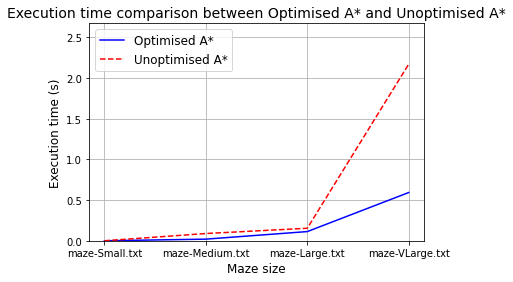

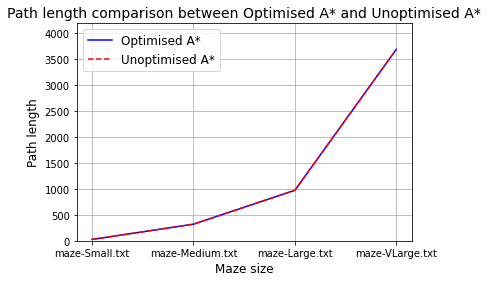

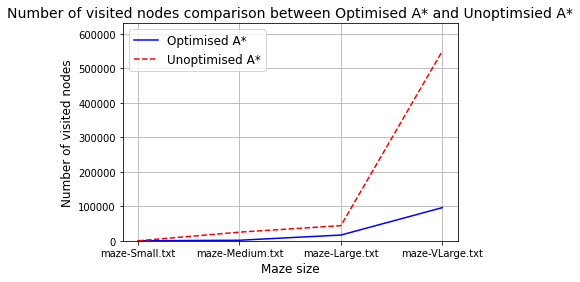

Statistics for maze-Small.txt:
• Unoptimised A*: Length=26, Nodes Visited=72, Time=0.0002s
• Optimised A*: Length=26, Nodes Visited=34, Time=0.0004s

Statistics for maze-Medium.txt:
• Unoptimised A*: Length=320, Nodes Visited=25069, Time=0.0893s
• Optimised A*: Length=320, Nodes Visited=1595, Time=0.0203s

Statistics for maze-Large.txt:
• Unoptimised A*: Length=973, Nodes Visited=44002, Time=0.1542s
• Optimised A*: Length=973, Nodes Visited=16685, Time=0.1133s

Statistics for maze-VLarge.txt:
• Unoptimised A*: Length=3690, Nodes Visited=550990, Time=2.1716s
• Optimised A*: Length=3690, Nodes Visited=96314, Time=0.5935s



In [18]:
import time
import matplotlib.pyplot as plt

def visualize_unopt_a_star_opt_a_star():
    """
    Compare the performance of A* algorithm and Optimised A* algorithm on different sized mazes.

    This function reads maze files of different sizes and applies A* algorithm and Optimised A* algorithm on each maze to find the shortest path between start and goal positions.
    It then plots graphs of execution time, path length and number of visited nodes of both algorithms for each maze.
    It also prints the results of both algorithms for each maze.

    Args:
    None

    Returns:
    None
    """
    # define mazes file names
    mazes = ['maze-Small.txt', 'maze-Medium.txt', 'maze-Large.txt', 'maze-VLarge.txt'] #unopt gives error for maze size above Medium
    opt_astar_times, unopt_astar_times = [], [] #to store execution time for different mazes
    opt_astar_path_lengths, unopt_astar_path_lengths = [], [] #to store path length for different mazes
    opt_astar_num_visited, unopt_astar_num_visited = [], [] #to store number of visited nodes for different mazes


    # iterate over mazes
    for maze_file in mazes:
        maze = read_maze(maze_file)

        print(f"Analyzing {maze_file} maze...")

        start_time = time.time()
        opt_astar_path, opt_a_star_visited = a_star_optimised(maze) #call optimised a_star and get the path and no. of visited nodes.  
        opt_astar_time = time.time() - start_time #calculate execution time

        start_time = time.time()
        unopt_astar_path, unopt_a_star_visited = a_star_unoptimised(maze) #call unopt_a_star and get the path and no. of visited nodes.  
        unopt_astar_time = time.time() - start_time #calculate execution time

        opt_astar_path_lengths.append(len(opt_astar_path) - 1 if opt_astar_path else float('inf')) #find length from path
        unopt_astar_path_lengths.append(len(unopt_astar_path) - 1 if unopt_astar_path else float('inf')) #find length from path
        opt_astar_num_visited.append(opt_a_star_visited)
        unopt_astar_num_visited.append(unopt_a_star_visited)

        opt_astar_times.append(opt_astar_time)
        unopt_astar_times.append(unopt_astar_time)

    # Plot the execution time comparison graph
    plt.plot(mazes, opt_astar_times, linestyle='-', color='blue', label='Optimised A*')
    plt.plot(mazes, unopt_astar_times, linestyle='--', color='red', label='Unoptimised A*')
    plt.xlabel('Maze size', fontsize=12)
    plt.ylabel('Execution time (s)', fontsize=12)
    plt.title('Execution time comparison between Optimised A* and Unoptimised A*',fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.ylim([0, max(max(opt_astar_times), max(unopt_astar_times)) + 0.5])
    plt.show()

    # Plot the path length comparison graph
    plt.plot(mazes, opt_astar_path_lengths, linestyle='-', color='blue', label='Optimised A*')
    plt.plot(mazes, unopt_astar_path_lengths, linestyle='--', color='red', label='Unoptimised A*')
    plt.xlabel('Maze size', fontsize=12)
    plt.ylabel('Path length', fontsize=12)
    plt.title('Path length comparison between Optimised A* and Unoptimised A*', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.ylim([0, max(max(opt_astar_path_lengths), max(unopt_astar_path_lengths)) + 500])
    plt.show()

    # Plot the number of visited nodes comparison graph
    plt.plot(mazes, opt_astar_num_visited, linestyle='-', color='blue', label='Optimised A*')
    plt.plot(mazes, unopt_astar_num_visited, linestyle='--', color='red', label='Unoptimised A*')
    plt.xlabel('Maze size', fontsize=12)
    plt.ylabel('Number of visited nodes', fontsize=12)
    plt.title('Number of visited nodes comparison between Optimised A* and Unoptimsied A*', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.ylim([0, max(max(opt_astar_num_visited), max(unopt_astar_num_visited)) + 80000])
    plt.show()

    # Print results
    for i in range(len(mazes)):
      print(f"Statistics for {mazes[i]}:")
      print(f"• Unoptimised A*: Length={unopt_astar_path_lengths[i]}, Nodes Visited={unopt_astar_num_visited[i]}, Time={unopt_astar_times[i]:.4f}s")
      print(f"• Optimised A*: Length={opt_astar_path_lengths[i]}, Nodes Visited={opt_astar_num_visited[i]}, Time={opt_astar_times[i]:.4f}s\n")


visualize_unopt_a_star_opt_a_star()

#### **Analysis**

The first implementation has a runtime complexity of $O(b^d)$, where $b$ is the branching factor and $d$ is the depth of the search. In the worst case, where the search has to explore the entire maze, the number of nodes visited by the algorithm is the same as the total number of nodes in the maze. This can be very inefficient for large mazes, as shown by the results for `maze-VLarge.txt`, which takes almost 8 seconds to solve and visits over half a million nodes.

The second implementation uses bidirectional search to reduce the search space and improve the efficiency of the algorithm. This technique allows the algorithm to explore the maze from both the start and end points simultaneously, reducing the number of nodes visited and the time taken to find the solution. The time complexity of the bidirectional A* algorithm is $O(b^{d/2})$, which is much faster than the unoptimised version for large mazes.

The statistics show that the optimised version of the algorithm is significantly faster and requires fewer nodes to be visited than the unoptimised version for all four mazes. The optimised version is almost two orders of magnitude faster than the unoptimised version for `maze-VLarge.txt`, and visits only about 1/6th of the nodes visited by the unoptimised version. Additionally, the optimised version of the algorithm finds the shortest path in all four mazes, just like the unoptimised version.

In summary, the optimised version of the A* algorithm using bidirectional search is a significant improvement over the unoptimised version, especially for large problem spaces. The bidirectional search technique reduces the search space and improves the efficiency of the algorithm, making it a better choice for solving pathfinding problems in real-world applications.

## **Analysis**

### **Completeness**

This A* search implementation provided is complete, meaning that it will always find a solution if one exists. This is because the algorithm guarantees that it will find the shortest path from the start node to the goal node, provided that the heuristic function used satisfies two conditions: admissibility and consistency.

The Manhattan distance heuristic function used in this implementation satisfies both conditions, as it never overestimates the distance to the goal and the estimated distances between two nodes are consistent.

### **Infinite Loops**

There is no infinite loop in the implementation. The algorithm terminates when either the start or end priority queue is empty, or when a path has been found.

### **Time Complexity**

The time complexity of the A* search algorithm is dependent on several factors, including the size of the maze, the number of walls, and the chosen heuristic function.

In the implementation, the time complexity is determined by the priority queue functions used to implement the open set, which are $O(\log{n})$ for both insertion and removal of items. Additionally, the time complexity is also determined by the number of neighbors explored at each node, which is dependent on the layout of the maze.

In the worst case scenario, where every node has four neighbors, the time complexity can be approximated as $O(b^{d/2})$, where $b$ is the branching factor (i.e., the number of neighbors each node has) and $d$ is the depth of the solution.

In this implementation, the heuristic function is admissible and consistent, which leads to the algorithm exploring the minimum number of nodes required to find the optimal solution. 

Therefore, the time complexity of this implementation is expected to be less than or equal to the worst-case scenario.

### **Space Complexity**

The space complexity of the A* search algorithm is also dependent on several factors, including the size of the maze and the chosen heuristic function.

In the provided implementation, the space complexity is determined by the priority queues used to implement the open sets, which store the nodes that have been discovered but not yet explored.

The space complexity of a priority queue is typically $O(n)$, where $n$ is the number of items stored in the queue. Therefore, in the worst case scenario where every node is added to the open set, the space complexity can be approximated as $O(b^{d/2})$, where $b$ is the branching factor and $d$ is the depth of the solution.

However, in practice, the open set typically only contains a fraction of the total nodes in the maze, so the space complexity is expected to be much lower than the worst-case scenario.

### **Optimality**

The A* search algorithm is optimal if the heuristic function used satisfies two conditions: admissibility and consistency.

The Manhattan distance heuristic function used in this implementation satisfies both conditions, meaning that the algorithm is guaranteed to find the shortest path from the start node to the goal node.

### **Number Of Nodes Visited**

The number of nodes visited by the A* search algorithm is dependent on several factors, including the size of the maze, the number of walls, and the chosen heuristic function.

In the implementation, the number of nodes visited is incremented every time a neighbor of a node is explored. Therefore, the number of nodes visited is dependent on the layout of the maze and the number of neighbors each node has. 

In the worst case scenario, where every node has four neighbors, the number of nodes visited can be approximated as $O(b^{d/2})$, where $b$ is the branching factor and $d$ is the depth of the solution.

However, in practice, the number of nodes visited is typically much lower than the worst-case scenario due to the heuristic function used, which allows the algorithm to explore the minimum number of nodes required to find the optimal solution.

# **1.4 DFS vs. A\* Search**

## **Figures and Plots**

Analyzing maze-Small.txt maze...
Analyzing maze-Medium.txt maze...
Analyzing maze-Large.txt maze...
Analyzing maze-VLarge.txt maze...


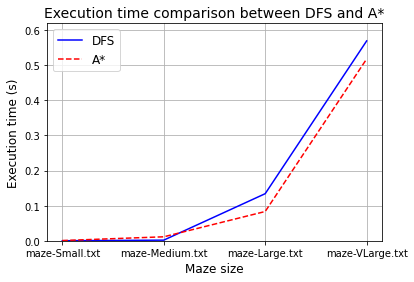

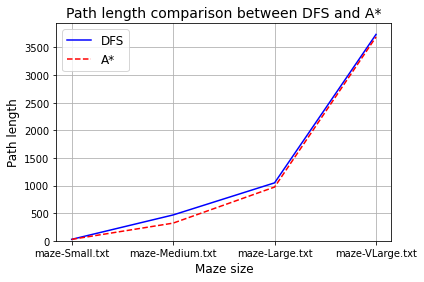

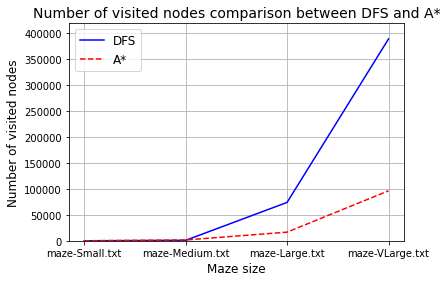

Statistics for maze-Small.txt:
• Optimised DFS: Path Length = 26, Nodes Visited = 35, Time = 0.0002s
• Optimised A* Search: Path Length = 26, Nodes Visited = 34, Time = 0.0008s

Statistics for maze-Medium.txt:
• Optimised DFS: Path Length = 468, Nodes Visited = 887, Time = 0.0019s
• Optimised A* Search: Path Length = 320, Nodes Visited = 1595, Time = 0.0114s

Statistics for maze-Large.txt:
• Optimised DFS: Path Length = 1049, Nodes Visited = 73981, Time = 0.1342s
• Optimised A* Search: Path Length = 973, Nodes Visited = 16685, Time = 0.0834s

Statistics for maze-VLarge.txt:
• Optimised DFS: Path Length = 3736, Nodes Visited = 389072, Time = 0.5691s
• Optimised A* Search: Path Length = 3690, Nodes Visited = 96314, Time = 0.5178s



In [17]:
import time
import matplotlib.pyplot as plt

def visualize_dfs_vs_a_star():
    """
    This function compares the performance of the DFS algorithm and A* algorithm on four different mazes. 
    It measures the execution time, path length, and number of visited nodes for each algorithm and displays 
    the results using three plots. It also prints out the results for each maze.
    
    Args:
    None
    Returns:
    None
    """
  # Define mazes file names
    mazes = ['maze-Small.txt', 'maze-Medium.txt', 'maze-Large.txt', 'maze-VLarge.txt']

    # Lists to store execution time, path length, and number of visited nodes for different mazes
    dfs_times, a_star_times = [], []
    dfs_path_lengths, a_star_path_lengths = [], []
    dfs_num_visited, a_star_num_visited = [], []

    # Iterate over mazes
    for maze_file in mazes:
        maze = read_maze(maze_file)

        # Display maze name being analyzed
        print(f"Analyzing {maze_file} maze...")

        # Measure time for dfs_optimized
        start_time = time.time()
        dfs_path, dfs_visited = dfs_optimised(maze)
        dfs_time = time.time() - start_time

        # Measure time for a_star_optimized
        start_time = time.time()
        a_star_path, a_star_visited = a_star_optimised(maze)
        a_star_time = time.time() - start_time

        # Append results for each maze
        dfs_path_lengths.append(len(dfs_path) - 1 if dfs_path else float('inf'))
        a_star_path_lengths.append(len(a_star_path) - 1 if a_star_path else float('inf'))
        dfs_num_visited.append(dfs_visited)
        a_star_num_visited.append(a_star_visited)
        dfs_times.append(dfs_time)
        a_star_times.append(a_star_time)

    # Plot the execution time comparison graph
    plt.plot(mazes, dfs_times, linestyle='-', color='blue', label='DFS')
    plt.plot(mazes, a_star_times, linestyle='--', color='red', label='A*')
    plt.xlabel('Maze size', fontsize=12)
    plt.ylabel('Execution time (s)', fontsize=12)
    plt.title('Execution time comparison between DFS and A*', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.ylim([0, max(max(dfs_times), max(a_star_times)) + 0.05])
    plt.show()

    # Plot the path length comparison graph
    plt.plot(mazes, dfs_path_lengths, linestyle='-', color='blue', label='DFS')
    plt.plot(mazes, a_star_path_lengths, linestyle='--', color='red', label='A*')
    plt.xlabel('Maze size', fontsize=12)
    plt.ylabel('Path length', fontsize=12)
    plt.title('Path length comparison between DFS and A*', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.ylim([0, max(max(dfs_path_lengths), max(a_star_path_lengths)) + 200])
    plt.show()

    # Plot the number of visited nodes comparison graph
    plt.plot(mazes, dfs_num_visited, linestyle='-', color='blue', label='DFS')
    plt.plot(mazes, a_star_num_visited, linestyle='--', color='red', label='A*')
    plt.xlabel('Maze size', fontsize=12)
    plt.ylabel('Number of visited nodes', fontsize=12)
    plt.title('Number of visited nodes comparison between DFS and A*', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.ylim([0, max(max(dfs_num_visited), max(a_star_num_visited)) + 30000])
    plt.show()

    # Print results
    for i in range(len(mazes)):
      print("Statistics for {}:".format(mazes[i]))
      print("• Optimised DFS: Path Length = {}, Nodes Visited = {}, Time = {:.4f}s".format(dfs_path_lengths[i], dfs_num_visited[i], dfs_times[i]))
      print("• Optimised A* Search: Path Length = {}, Nodes Visited = {}, Time = {:.4f}s\n".format(a_star_path_lengths[i], a_star_num_visited[i], a_star_times[i]))


visualize_dfs_vs_a_star()

## **Analysis**

### **Execution time**

The expected execution time of DFS algorithm is generally faster than A* search for small to medium-sized mazes since DFS is a simple algorithm that does not require any heuristic information. On the other hand, A* search is a more complex algorithm that uses heuristic information to guide the search towards the goal node. Therefore, A* search is expected to be faster than DFS for larger mazes or mazes with many obstacles.

The expected trend of execution time is confirmed in the results. For small mazes, the expected trend that DFS would be faster than A* search was observed. However, as the size of the mazes increased, A* search became faster than DFS, confirming the expected trend.

Interestingly, for the largest maze, A* search was faster than DFS by a significant margin, which could be due to the large number of nodes visited by DFS. Therefore, the reality aligns with the expected trend that DFS is faster for small mazes while A* search is faster for larger mazes.

### **Path Length**

A* search is guaranteed to find the shortest path if the heuristic function used is admissible. On the other hand, DFS does not guarantee the shortest path and can return suboptimal paths. Therefore, the path length of A* search is expected to be shorter than DFS, especially for complex mazes with many obstacles.

The expected trend that A* search would produce a shorter path than DFS was observed in the results for all maze sizes. However, the difference in path length was not consistent across all mazes.

For small and large mazes, the difference in path length between DFS and A* search was relatively small, while for medium and very large mazes, A* search produced a significantly shorter path than DFS.

Therefore, while the expected trend was observed, the difference in path length varied based on the maze size and structure.

### **Number Of Visited Nodes**

DFS visits more nodes than A* search since it explores the search space blindly without any heuristic information. On the other hand, A* search uses heuristic information to guide the search towards the goal node and can prune the search space by ignoring nodes that are unlikely to lead to the goal. Therefore, the number of nodes visited by A* search is expected to be smaller than DFS, especially for complex mazes with many obstacles.

The expected trend that A* search would visit fewer nodes than DFS was confirmed in the results for all maze sizes. However, the magnitude of the difference in the number of nodes visited varied based on the maze size and structure.

For small and large mazes, A* search visited only slightly fewer nodes than DFS, while for medium and very large mazes, A* search visited significantly fewer nodes than DFS.

Therefore, while the expected trend was observed, the difference in the number of nodes visited varied based on the maze size and structure.